In [95]:
# Import Dependencies
%matplotlib inline

# Standard import 
import math, time, random, datetime
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import catboost
from catboost import CatBoostClassifier, Pool, cv

#import warnings
#warnings.filterwarnings('ignore')

# Loading the data

In [2]:
# Import the predownloaded data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# Take a first look at the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Take a first look at the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Explore the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Description
* survival - Survival - 0 = No, 1 = Yes 
* pclass - Ticket class - 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower) 
* sex - Sex 
* Age - Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp - # of siblings / spouses aboard the Titanic	
* parch - # of parents / children aboard the Titanic	
* ticket - Ticket number	
* fare - Passenger fare	
* cabin - Cabin number	
* embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Missing Values

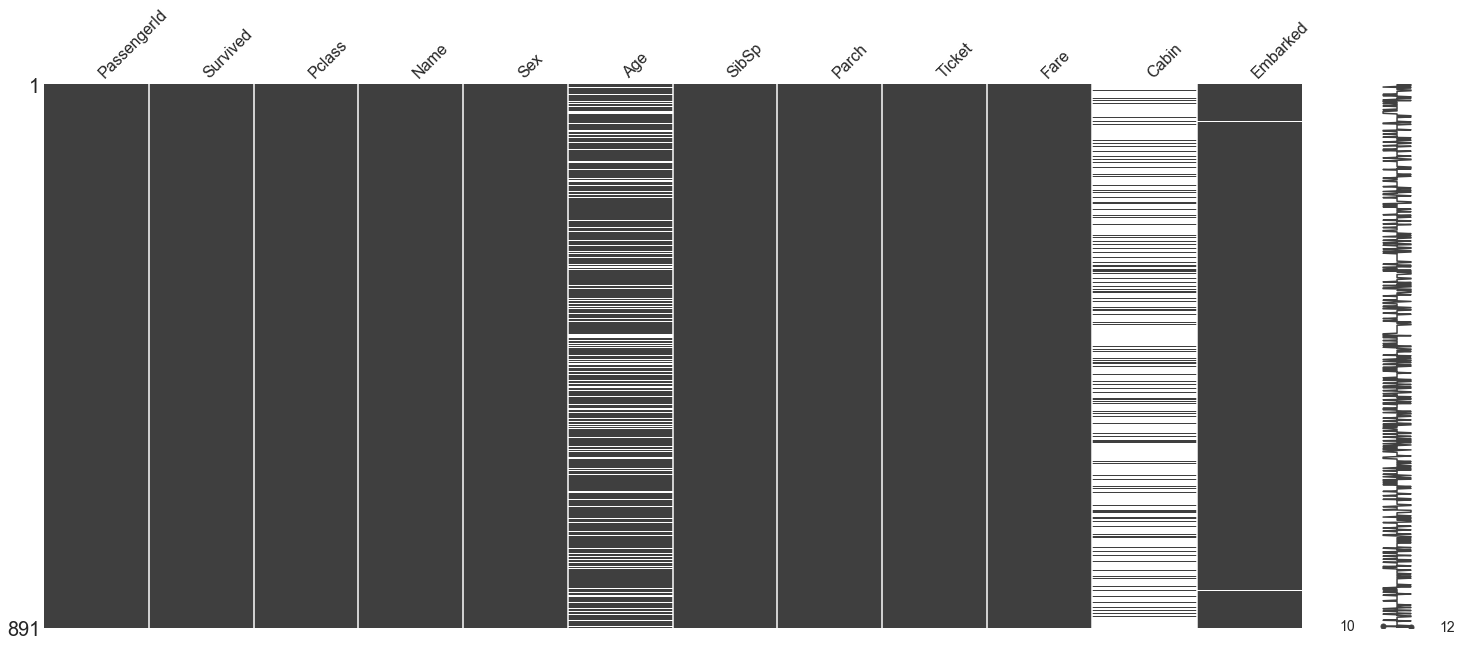

In [7]:
# Create a matrix of missing values. Gray space - values, white space - missings.
missingno.matrix(train)

There are a lot of missing values in variables: CABIN, AGE.  
Also a few missing values in variable EMBARKED.   

In [8]:
missing_values = {}
def count_missings(df):
    """
    Count and print amount of missing values in each variable. Prints if > 0.
    ::param_df:: - Data Frame
    """
    for column in df.columns:
        vals_in_col = df[column].value_counts().sum()
        total_vals = len(df)
        missings = total_vals - vals_in_col
        missing_values[column] = missings
        if missings > 0:
            print ("Missings in %s: %d"%(str(column),int(missings)))

count_missings(train)

Missings in Age: 177
Missings in Cabin: 687
Missings in Embarked: 2


# EXPLORATORY DATA ANALYSIS

In [9]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

# Feature: Survived (Target)
Key: 0 = did not survive, 1 = survived

Missing values in SURVIVED:
0
Values in SURIVED:
0    549
1    342
Name: Survived, dtype: int64


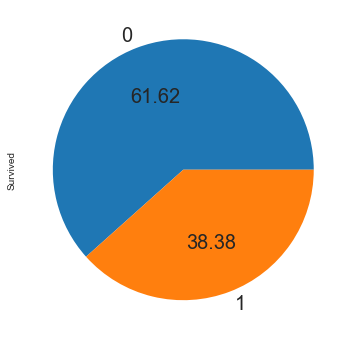

In [10]:
# Count missings
print("Missing values in SURVIVED:")
print(missing_values["Survived"])

# Count values
print("Values in SURIVED:")
print(train["Survived"].value_counts())

# Plot the distribution of the variable
train["Survived"].value_counts().plot.pie(autopct="%.2f", fontsize=20, figsize=(6,6))

In [11]:
# Add the featre for the next analysis
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

# Feature: Pclass
Description: The ticket class of the passenger.  
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Missing values in PCLASS:
0
Values in PCLASS:
3    491
1    216
2    184
Name: Pclass, dtype: int64


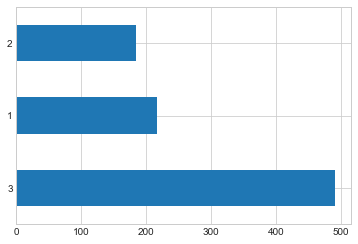

In [12]:
# Count missings
print("Missing values in PCLASS:")
print(missing_values["Pclass"])

# Count values
print("Values in PCLASS:")
print(train["Pclass"].value_counts())

# Plot the distribution of values
train["Pclass"].value_counts().plot.barh()

Currently the variable is numerical, which makes no sense.  
Transformation into categorical is required.

In [13]:
# Store for the analysis
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

# Feature: Name
Description: The name of the passenger.

In [14]:
# Count missings
print("Missing values in NAME:")
print(missing_values["Name"])
print("==================================")
# Count values
print("Values in Name:")
print(train["Name"].value_counts())

Missing values in NAME:
0
Values in Name:
Futrelle, Mrs. Jacques Heath (Lily May Peel)                           1
White, Mr. Percival Wayland                                            1
Goodwin, Master. Harold Victor                                         1
Mellors, Mr. William John                                              1
Oreskovic, Mr. Luka                                                    1
Gheorgheff, Mr. Stanio                                                 1
Nasser, Mrs. Nicholas (Adele Achem)                                    1
Ford, Mr. William Neal                                                 1
Mineff, Mr. Ivan                                                       1
Collyer, Mrs. Harvey (Charlotte Annie Tate)                            1
Bonnell, Miss. Elizabeth                                               1
Cunningham, Mr. Alfred Fleming                                         1
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")    1
Foreman, 

#### To do:
- extract titles "Mr." / "Miss." etc, to use them as a new categorical variable
- extract name lenght as a new numerical variable (Idea: longer names belongs to upper class people). Check correlation with PCLASS
  
Current usage is impossible

# Feature: Sex
Description: The sex of the passenger (male or female).

Missing values in SEX:
0
Values in Sex:
male      577
female    314
Name: Sex, dtype: int64


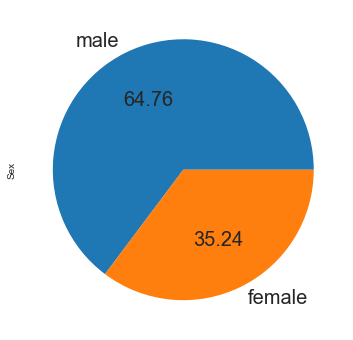

In [15]:
# Count missings
print("Missing values in SEX:")
print(missing_values["Sex"])

# Count values
print("Values in Sex:")
print(train["Sex"].value_counts())

# Plot the distribution of the variable
train["Sex"].value_counts().plot.pie(autopct="%.2f", fontsize=20, figsize=(6,6))

In [16]:
# Store for the analysis
df_bin['Sex'] = train['Sex']
df_bin.loc[df_bin["Sex"]=="male", "Sex"] = 0 # Change all "male" to 0
df_bin.loc[df_bin["Sex"]=="female", "Sex"] = 1 # Change all "female" to 1
print(df_bin.head())

df_con['Sex'] = train['Sex']
print(df_con.head())

   Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0
   Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male


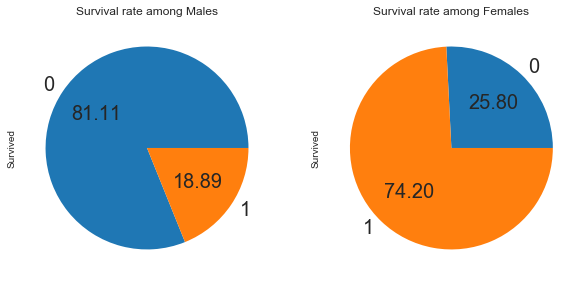

In [17]:
# Check survival rate among males 
fgr = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
df_bin.loc[df_bin["Sex"]==0,"Survived"].value_counts(sort=False).plot(kind="pie", autopct="%.2f", fontsize=20, title="Survival rate among Males")
plt.subplot(1, 2, 2)
# Check survival rate among females 
df_bin.loc[df_bin["Sex"]==1,"Survived"].value_counts(sort=False).plot(kind="pie", autopct="%.2f", fontsize=20, title="Survival rate among Females")

In [18]:
# Check correlation between sex and survival rate
df_bin[["Survived","Sex"]].corr()

,Survived,Sex
Survived,1.000000,0.543351
Sex,0.543351,1.000000


# Feature: Age
Description: The age of the passenger.

In [19]:
# Count missings
print("Missing values in Age:")
print(missing_values["Age"])

Missing values in Age:
177


A lot of missings in the variable.
#### TODO:
- Check the dependency between a title (Mrs, Mr, etc) and AGE
- Build a regression model to fill the missings in AGE

### Function to create count and distribution visualisations

In [20]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

# Feature: SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [21]:
# Count missings
print("Missing values in SibSp:")
print(missing_values["SibSp"])

# Count values
print("Values in SibSp:")
print(train["SibSp"].value_counts())

Missing values in SibSp:
0
Values in SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [22]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

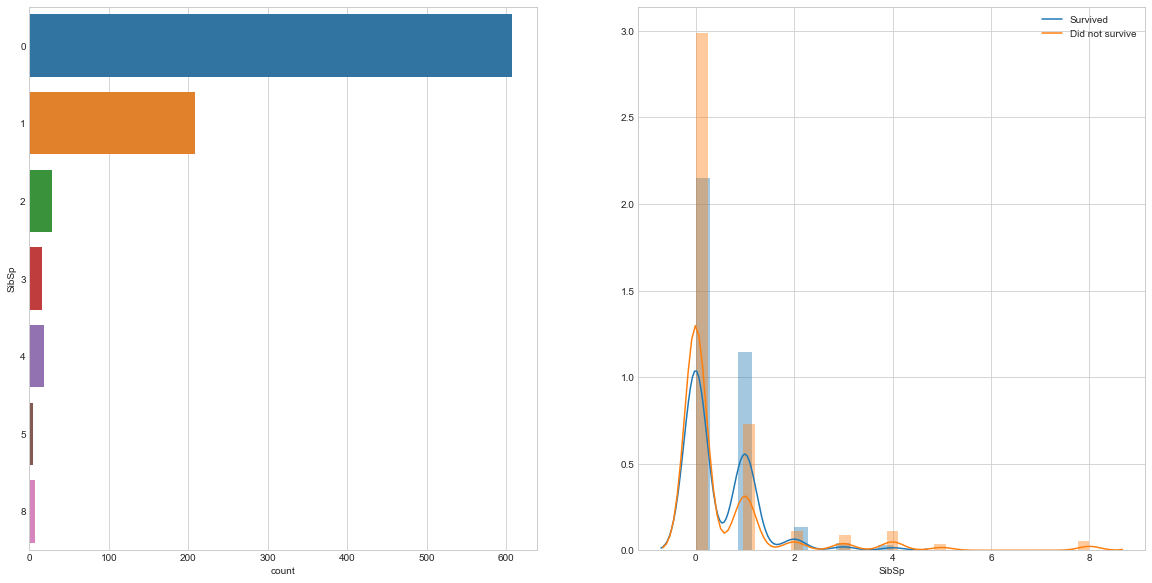

In [23]:
# Visualise the counts of SibSp and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

# Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

In [24]:
# Count missings
print("Missing values in Parch:")
print(missing_values["Parch"])

# Count values
print("Values in Parch:")
print(train["Parch"].value_counts())

Missing values in Parch:
0
Values in Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [25]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

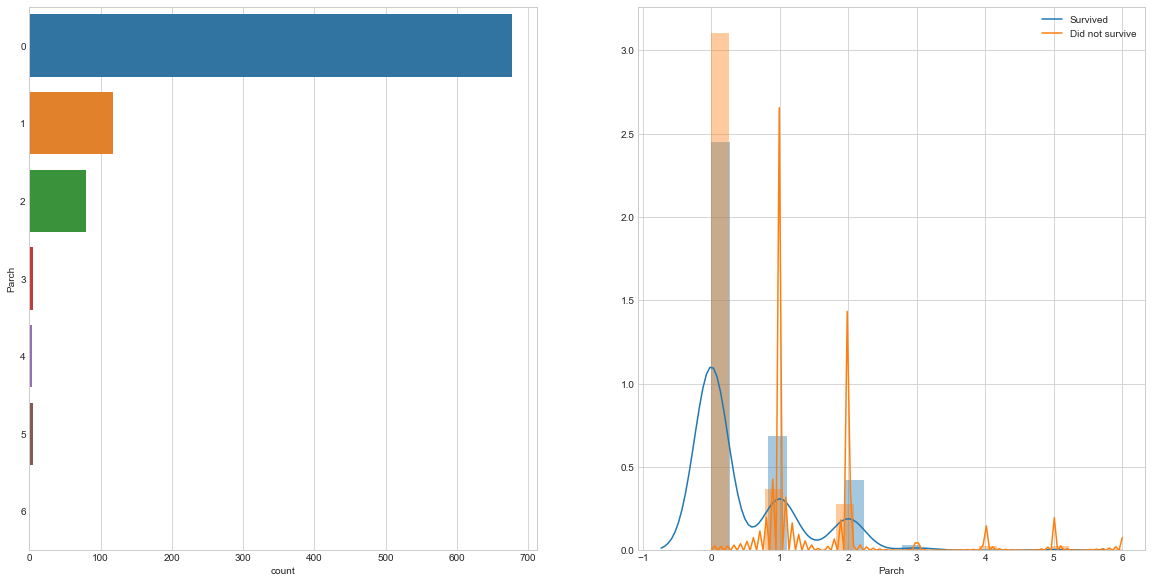

In [26]:
# Visualise the counts of Parch and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

# Feature: Ticket
Description: The ticket number of the boarding passenger.

In [27]:
# Count missings
print("Missing values in Ticket:")
print(missing_values["Ticket"])

# Count values
print("Values in Ticket:")
print(train["Ticket"].value_counts())

Missing values in Ticket:
0
Values in Ticket:
1601                  7
347082                7
CA. 2343              7
CA 2144               6
3101295               6
347088                6
S.O.C. 14879          5
382652                5
347077                4
W./C. 6608            4
19950                 4
2666                  4
17421                 4
LINE                  4
113781                4
113760                4
349909                4
4133                  4
PC 17757              4
PC 17572              3
SC/Paris 2123         3
347742                3
24160                 3
13502                 3
C.A. 34651            3
PC 17760              3
35273                 3
110152                3
363291                3
29106                 3
                     ..
323951                1
A.5. 11206            1
W./C. 6609            1
248747                1
26707                 1
347060                1
315097                1
2629                  1
347064            

#### To do:
- find any patterns in tickets to reduce the dimensionality

Current usage is impossible

# Feature: Fare
Description: How much the ticket cost.

In [28]:
# Count missings
print("Missing values in Fare:")
print(missing_values["Fare"])

# Count values
print("Values in Fare:")
print(train["Fare"].value_counts())

Missing values in Fare:
0
Values in Fare:
8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64


In [29]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [30]:
# Check th bins
df_bin['Fare'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

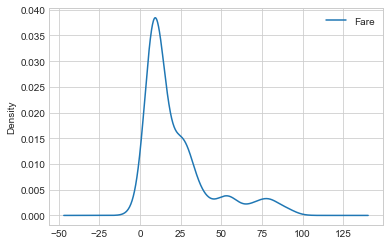

In [31]:
# Check the destribution in the biggest bin
train.loc[train['Fare']<=102.466,["Fare"]].plot.kde()

#### To do:
- Find better bins

# Feature: Cabin
Description: The cabin number where the passenger was staying.

In [32]:
# Count missings
print("Missing values in Cabin:")
print(missing_values["Cabin"])

# Count values
print("Values in Cabin:")
print(train["Cabin"].value_counts())

Missing values in Cabin:
687
Values in Cabin:
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
E101           3
F2             3
C22 C26        3
E67            2
B49            2
B22            2
C123           2
D33            2
C92            2
B28            2
D35            2
C52            2
D36            2
E121           2
D26            2
C124           2
B5             2
C78            2
C126           2
B18            2
E25            2
E24            2
F G73          2
E44            2
E8             2
              ..
A16            1
B79            1
E77            1
C54            1
E36            1
D11            1
C101           1
B50            1
A5             1
D9             1
E50            1
B101           1
E63            1
A6             1
C103           1
B82 B84        1
C95            1
E58            1
D37            1
C111           1
B73            1
B19            1
B69            1
C118           1
D19            1
A2

#### To do:
- Are there any dependencies between Cabin and Ticket?

# Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

Missing values in Embarked:
2
Values in Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


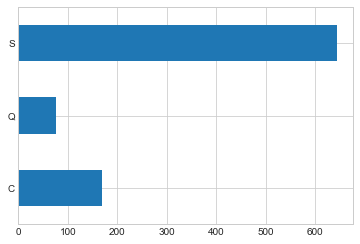

In [33]:
# Plot the distribution of values
train["Embarked"].value_counts(sort=False).plot.barh()

# Count missings
print("Missing values in Embarked:")
print(missing_values["Embarked"])

# Count values
print("Values in Embarked:")
print(train["Embarked"].value_counts())

In [34]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

# Remove Embarked rows which are missing values
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

### Check the Data Frames for the future analysis

In [35]:
df_bin

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S
5,0,3,0,0,0,"(-0.512, 102.466]",Q
6,0,1,0,0,0,"(-0.512, 102.466]",S
7,0,3,0,3,1,"(-0.512, 102.466]",S
8,1,3,1,0,2,"(-0.512, 102.466]",S
9,1,2,1,1,0,"(-0.512, 102.466]",C


In [36]:
df_con

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


# Feature Encoding 
Encode binned dataframe (df_bin) with one-hot encoding and continuous dataframe (df_con) with the label encoding function from sklearn.

In [39]:
# List of features
one_hot_cols = df_bin.columns.tolist()
# Remove the target variable
one_hot_cols.remove('Survived')
# One hot encoding
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
# Label encoding
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


# MODELS
Start building machine learning models.

In [42]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [43]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

# Shape of the data (without labels)
print(X_train.shape)
# Shape of the labels
print(y_train.shape)

(889, 6)
(889,)


Define a function to fit machine learning algorithms form SKLearn

In [48]:
def fit_ml_algo(algo, X_train=X_train, y_train=y_train, cv=10):
    """
    Function that runs the requested algorithm and returns the accuracy metrics.
    ::param_algo:: = sklearn algorithm
    ::param_X_train:: = matrix of features and observations, default = global variable 
    ::param_y_train:: = target variable, default = global variable
    ::cv:: = number of folds for cross-validation, default = 10
    
    ::return_acc:: = accuracy rounded to 5 decimals. 
    ::return_acc_cv:: = accuracy on cross-validation rounded to 5 decimals.
    ::return_train_pred:: = vecor of predictions
    """    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 5)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 5)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [56]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression())
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.07762
Accuracy CV 10-Fold: 78.51519
Running Time: 0:00:00.082243


C:\Apps\Anaconda\envs\pure\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neightbours

In [60]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier())
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.43982
Accuracy CV 10-Fold: 73.67829
Running Time: 0:00:00.115429


### Gaussian Naive Bayes

In [61]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB())
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.71541
Accuracy CV 10-Fold: 76.37795
Running Time: 0:00:00.077359


### Linear Support Vector Machines (SVC)

In [69]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC())
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

C:\Apps\Anaconda\envs\pure\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 79.64004
Accuracy CV 10-Fold: 76.94038
Running Time: 0:00:00.259307


### Stochastic Gradient Descent

In [80]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier())
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 62.99213
Accuracy CV 10-Fold: 59.39258
Running Time: 0:00:00.069813


C:\Apps\Anaconda\envs\pure\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Decision Tree Classifier

In [84]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier())
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46344
Accuracy CV 10-Fold: 78.96513
Running Time: 0:00:00.060839


### Gradient Boost Trees

In [88]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier())
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.3892
Accuracy CV 10-Fold: 81.10236
Running Time: 0:00:00.360039


### CatBoost Algorithm

In [89]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [93]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [97]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.016206
0:	learn: 0.6838699	total: 103ms	remaining: 1m 43s
1:	learn: 0.6753070	total: 129ms	remaining: 1m 4s
2:	learn: 0.6664907	total: 159ms	remaining: 52.8s


3:	learn: 0.6580711	total: 189ms	remaining: 47.1s
4:	learn: 0.6509907	total: 210ms	remaining: 41.7s
5:	learn: 0.6428456	total: 241ms	remaining: 40s
6:	learn: 0.6358374	total: 277ms	remaining: 39.3s
7:	learn: 0.6285425	total: 310ms	remaining: 38.4s
8:	learn: 0.6215779	total: 342ms	remaining: 37.7s
9:	learn: 0.6151968	total: 378ms	remaining: 37.4s
10:	learn: 0.6090478	total: 401ms	remaining: 36s
11:	learn: 0.6030273	total: 429ms	remaining: 35.3s
12:	learn: 0.5975315	total: 462ms	remaining: 35.1s


13:	learn: 0.5918302	total: 507ms	remaining: 35.7s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

14:	learn: 0.5864084	total: 556ms	remaining: 36.5s
15:	learn: 0.5819175	total: 577ms	remaining: 35.5s
16:	learn: 0.5766028	total: 606ms	remaining: 35s
17:	learn: 0.5726184	total: 633ms	remaining: 34.5s
18:	learn: 0.5680301	total: 650ms	remaining: 33.6s
19:	learn: 0.5632747	total: 684ms	remaining: 33.5s
20:	learn: 0.5593913	total: 708ms	remaining: 33s
21:	learn: 0.5551887	total: 746ms	remaining: 33.2s
22:	learn: 0.5514062	total: 778ms	remaining: 33.1s
23:	learn: 0.5473766	total: 813ms	remaining: 33.1s
24:	learn: 0.5437270	total: 832ms	remaining: 32.5s
25:	learn: 0.5398505	total: 865ms	remaining: 32.4s
26:	learn: 0.5364056	total: 892ms	remaining: 32.1s
27:	learn: 0.5330146	total: 916ms	remaining: 31.8s
28:	learn: 0.5295665	total: 950ms	remaining: 31.8s
29:	learn: 0.5262067	total: 991ms	remaining: 32s
30:	learn: 0.5231328	total: 1.01s	remaining: 31.7s
31:	learn: 0.5197970	total: 1.06s	remaining: 32s
32:	learn: 0.5173964	total: 1.09s	remaining: 32s
33:	learn: 0.5140603	total: 1.13s	remaini

In [98]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6841287	test: 0.6840923	best: 0.6840923 (0)
1:	learn: 0.6750439	test: 0.6753762	best: 0.6753762 (1)
2:	learn: 0.6669693	test: 0.6672991	best: 0.6672991 (2)
3:	learn: 0.6590062	test: 0.6592945	best: 0.6592945 (3)
4:	learn: 0.6519361	test: 0.6521554	best: 0.6521554 (4)
5:	learn: 0.6441823	test: 0.6445944	best: 0.6445944 (5)
6:	learn: 0.6371463	test: 0.6377090	best: 0.6377090 (6)
7:	learn: 0.6303070	test: 0.6306929	best: 0.6306929 (7)	total: 2.56s	remaining: 5m 17s
8:	learn: 0.6237749	test: 0.6243508	best: 0.6243508 (8)
9:	learn: 0.6182265	test: 0.6189655	best: 0.6189655 (9)
10:	learn: 0.6121909	test: 0.6127545	best: 0.6127545 (10)
11:	learn: 0.6062864	test: 0.6070267	best: 0.6070267 (11)
12:	learn: 0.6008009	test: 0.6017709	best: 0.6017709 (12)
13:	learn: 0.5951098	test: 0.5960187	best: 0.5960187 (13)
14:	learn: 0.5897669	test: 0.5909691	best: 0.5909691 (14)
15:	learn: 0.5845533	test: 0.5860694	best: 0.5860694 (15)
16:	learn: 0.5797422	test: 0.5814088	best: 0.5814088 (16)
17:

In [99]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy CV 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 88.3
Accuracy CV 10-Fold: 81.89
Running Time: 0:06:07.354226


# Model Selection
Choose a model with the best cross-validation accuracy

In [100]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46344
7,CatBoost,88.30000
6,Gradient Boosting Trees,86.38920
0,KNN,81.43982
4,Linear SVC,79.64004
1,Logistic Regression,79.07762
2,Naive Bayes,76.71541
3,Stochastic Gradient Decent,62.99213


In [101]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.89000
6,Gradient Boosting Trees,81.10236
5,Decision Tree,78.96513
1,Logistic Regression,78.51519
4,Linear SVC,76.94038
2,Naive Bayes,76.37795
0,KNN,73.67829
3,Stochastic Gradient Decent,59.39258


# Feature Importance

In [128]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    # Combine importance and columns in a data frame and sort the values by importance
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns}).sort_values('imp', ascending=False)
    # Plot (reverse, to have the most important features on the top)
    _ = fea_imp[::-1].plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
1,30.666401,Sex
0,22.230110,Pclass
4,14.632381,Fare
3,13.146866,Parch
5,10.456826,Embarked
2,8.867417,SibSp


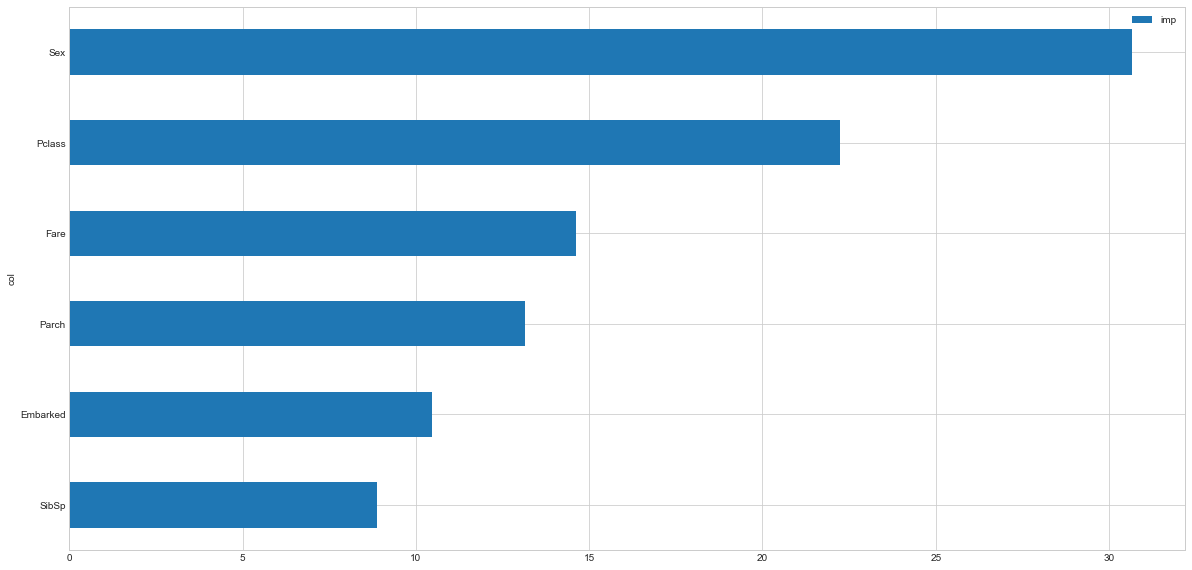

In [129]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

# Precision and Recall

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.  
**Precision** = a metric which measures a models ability to correctly identify only relevant instances.  
**F1 score** = combination of the precision and recall.

In [136]:
# Define metrics
metrics = ['Precision', 'Recall', 'F1', 'AUC']
# 
eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Precision: 0.8885236676836308
Recall: 0.7299352941176471
F1: 0.8005888485845598
AUC: 0.9094382299367834


# Submission

In [142]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[X_train.columns]
                                     .apply(LabelEncoder().fit_transform))
predictions[:20]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1.])

In [143]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [144]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [148]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('submission/catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
